# Credit EDA Case Study

## Business Understanding:
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 ## Business Objectives:
 This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
  The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [2]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')
# Importing the required libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Application Data.

Read the application data file provided and store it in a dataframe `appdata`.

In [3]:
appdata = pd.read_csv("application_data.csv")
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
appdata.shape

(307511, 122)

In [5]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- ###  Subtask 1.3: Dropping Columns

Dropping Columns which have missing values on higher side.

In [6]:
missing = (appdata.isnull().sum() / appdata.isnull().count()*100).sort_values(ascending = False)
missing.head(60)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
type(missing)

pandas.core.series.Series

In [8]:
m1 = pd.DataFrame(missing)
m1

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


In [9]:
m1[m1[0]>32].index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [10]:
inp0 = appdata.copy()

In [11]:
inp0.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'],axis=1,inplace=True)

In [12]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [13]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
#inp0.columns

- ###  Subtask 1.4: Handaling Missing Values

Handaling of missing Values.

<AxesSubplot:>

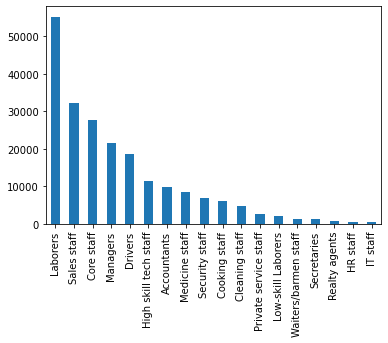

In [13]:
inp0.OCCUPATION_TYPE.value_counts().plot.bar()

#### Though 30% of values in occupation type are missing and majority of occupation type is Labourers we cannot extrapolate anything from the data about professions of missing values. So we leave the missing values as is for analysis purpose 

In [14]:
inp01 = inp0.loc[:,["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON",     
"AMT_REQ_CREDIT_BUREAU_WEEK",    
"AMT_REQ_CREDIT_BUREAU_DAY",    
"AMT_REQ_CREDIT_BUREAU_HOUR"]] 


In [15]:
inp01.describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


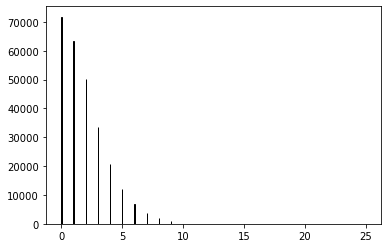

In [16]:
plt.hist(inp01.AMT_REQ_CREDIT_BUREAU_YEAR,bins = 1000 , edgecolor= "black" , color = 'white')
plt.show()

In [17]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(1 , inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0 , inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_MON.fillna(0 , inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0 , inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0 , inplace = True)
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0 , inplace = True)

#### Missing values have been imputed with median values

## Task 2: Univariate Analysis

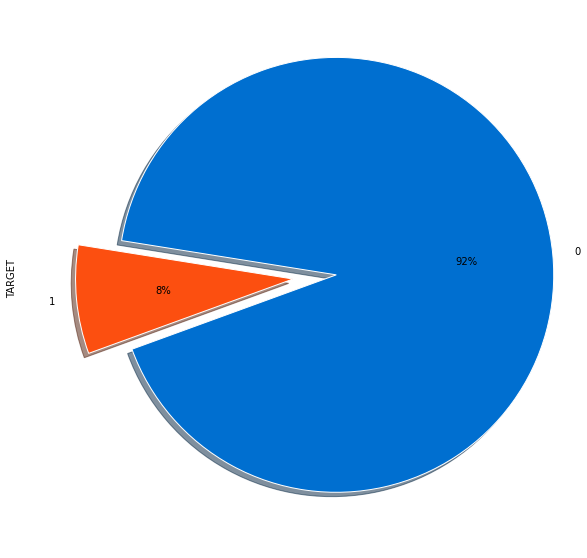

In [18]:
plt.figure(figsize=(10,10))
inp0.groupby("TARGET")["TARGET"].count().plot.pie(startangle=200, colors=['#006fd0', '#fc4f10'], wedgeprops={'edgecolor': 'white'}, autopct='%1.f%%', explode=(0.2, 0), shadow=True)
plt.show()

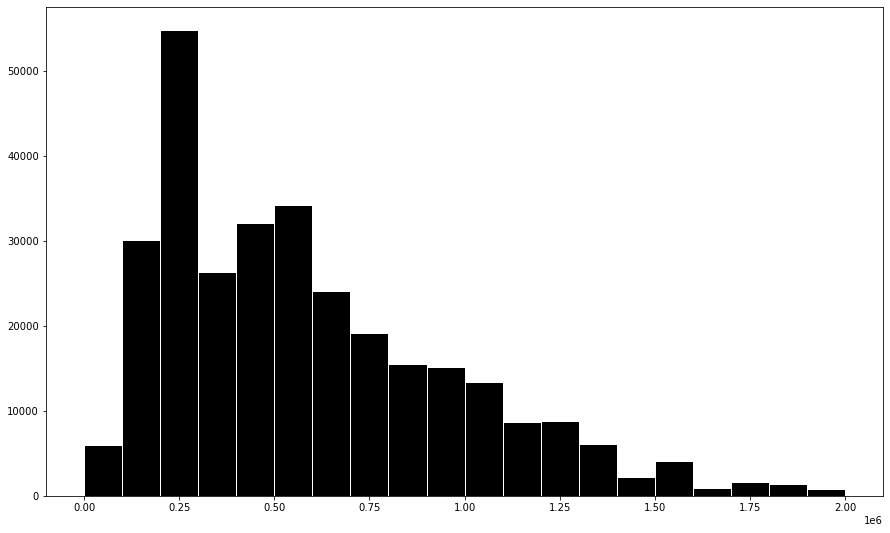

In [38]:
plt.figure(figsize=(15,9))
plt.hist(inp0.AMT_CREDIT , bins =20 , range = [0 , 2000000] , color = 'black' , edgecolor = 'white' )
plt.show()


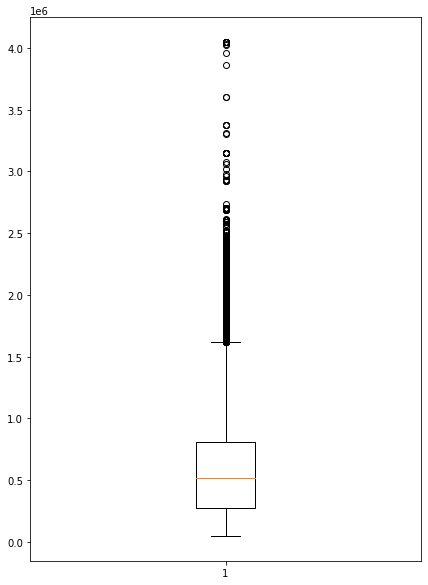

In [25]:
plt.figure(figsize=(7,10))
plt.boxplot(inp0["AMT_CREDIT"])
plt.show()

In [20]:
inp0.groupby("TARGET")["AMT_CREDIT"].mean()

TARGET
0    602648.282002
1    557778.527674
Name: AMT_CREDIT, dtype: float64

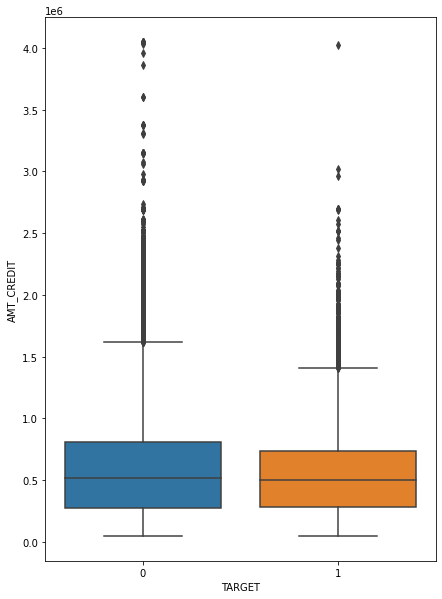

In [26]:
plt.figure(figsize=(7,10))
sns.boxplot(data = inp0 , x = 'TARGET' , y = 'AMT_CREDIT' )
plt.show()

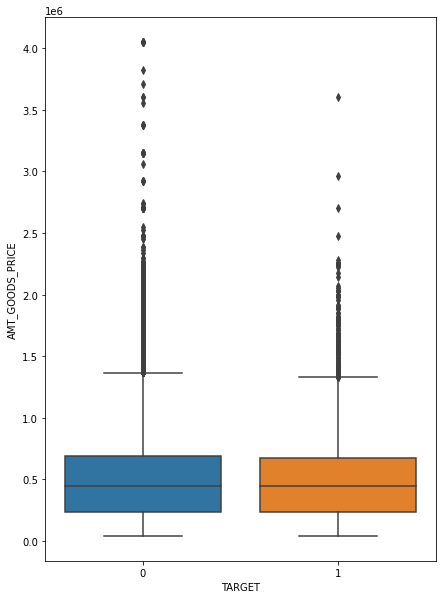

In [28]:
plt.figure(figsize=(7,10))
sns.boxplot(data = inp0 , x = 'TARGET' , y = 'AMT_GOODS_PRICE' )
plt.show()

## Task 3: Bivariate Analysis

- ### Subtask 3.1 : Analysis of relationship between occupation type and likelyhood of payment

In [144]:
occ = inp0.pivot_table(index = 'OCCUPATION_TYPE' , values = 'TARGET' , aggfunc ="mean" )
occ


,TARGET
OCCUPATION_TYPE,
Accountants,0.048303
Cleaning staff,0.096067
Cooking staff,0.104440
Core staff,0.063040
Drivers,0.113261
HR staff,0.063943
High skill tech staff,0.061599
IT staff,0.064639
Laborers,0.105788


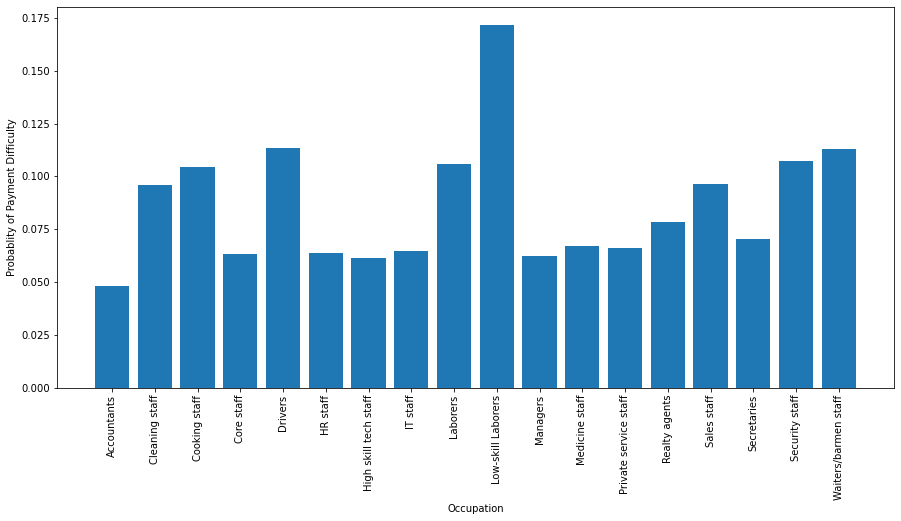

In [147]:
plt.figure(figsize=(15,7))
plt.bar(occ.index , occ.TARGET)
plt.xticks(rotation = 90)
plt .ylabel("Probablity of Payment Difficulty")
plt.xlabel("Occupation")
plt.show()


In [148]:
inp0.TARGET.mean()

0.08072881945686496

In [149]:
list(occ[occ["TARGET"]<0.08].index)

['Accountants',
 'Core staff',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Secretaries']

In [150]:
list(occ[occ["TARGET"]>0.08].index)

['Cleaning staff',
 'Cooking staff',
 'Drivers',
 'Laborers',
 'Low-skill Laborers',
 'Sales staff',
 'Security staff',
 'Waiters/barmen staff']

#### 'Accountants','Core staff', 'HR staff', 'High skill tech staff', 'IT staff', 'Managers','Medicine staff','Private service staff','Realty agents','Secretaries'  are more likely to repay


#### 'Cleaning staff','Cooking staff','Drivers','Laborers','Low-skill Laborers','Sales staff','Security staff','Waiters/barmen staff' are less likely to repay

- ### Subtask 3.2 : Ananlysis of relationship between education and likelyhood of payment

In [151]:
edu = inp0.pivot_table(index = 'NAME_EDUCATION_TYPE' , values = 'TARGET' , aggfunc ="mean"  )
edu

,TARGET
NAME_EDUCATION_TYPE,
Academic degree,0.018293
Higher education,0.053551
Incomplete higher,0.084850
Lower secondary,0.109277
Secondary / secondary special,0.089399


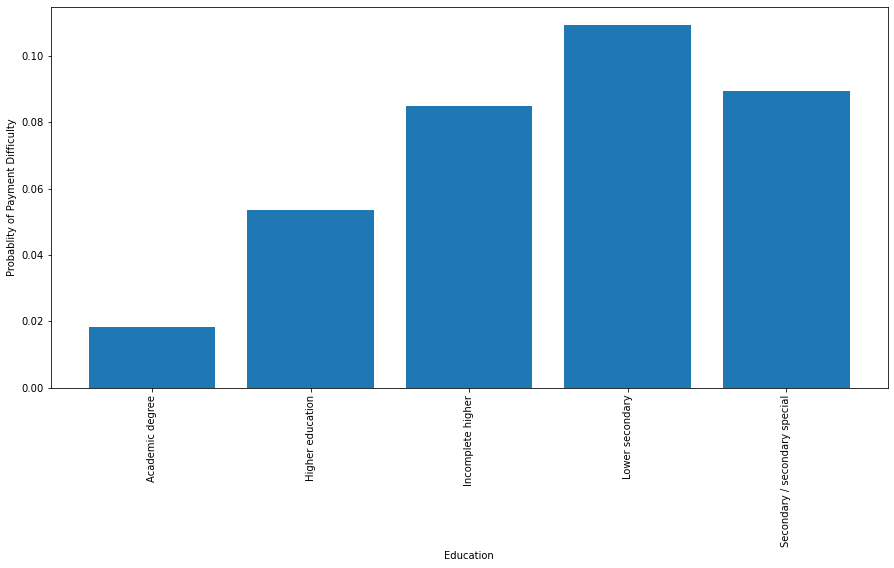

In [152]:
plt.figure(figsize=(15,7))
plt.bar(edu.index , edu.TARGET)
plt.xticks(rotation = 90)
plt .ylabel("Probablity of Payment Difficulty")
plt.xlabel("Education")
plt.show()

#### People having a academic degree or a higher education level are more likely to repay


#### People having incomplete higher or lesser education are less likely to repay

- ### Subtask 3.3 : Ananlysis of relationship between contract  type and likelyhood of payment

In [153]:
c_type = inp0.pivot_table(index = 'NAME_CONTRACT_TYPE' , values = {'TARGET' , 'AMT_CREDIT'} , aggfunc ={"mean" , 'count'} )
c_type

AMT_CREDIT                   TARGET          
                        count           mean     count      mean
NAME_CONTRACT_TYPE                                              
Cash loans             278232  627965.732538  278232.0  0.083459
Revolving loans         29279  324017.982172   29279.0  0.054783

#### Revolving loans are more likely to be repaid; they form 50% of the loan book in terms of credit amount with only 10% of borrowers. Company can concentrate on such loans   




- ### Subtask 3.4 : Ananlysis of relationship between age , employement duration , change in ID doc and likelyhood of payment

In [154]:
age = inp0.iloc[:,[1,17,18,19,20]]
age["MONTH_BIRTH"] = round(age["DAYS_BIRTH"]/-30)
age["YEAR_BIRTH"] = round(age["MONTH_BIRTH"]/12)
age["MONTH_EMPLOYED"] = round(age["DAYS_EMPLOYED"]/-30)
age["MONTH_REGISTRATION"] = round(age["DAYS_REGISTRATION"]/-30)
age["MONTH_ID_PUBLISH"] = round(age["DAYS_ID_PUBLISH"]/-30)
age.head()

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,MONTH_BIRTH,YEAR_BIRTH,MONTH_EMPLOYED,MONTH_REGISTRATION,MONTH_ID_PUBLISH
0,1,-9461,-637,-3648.0,-2120,315.0,26.0,21.0,122.0,71.0
1,0,-16765,-1188,-1186.0,-291,559.0,47.0,40.0,40.0,10.0
2,0,-19046,-225,-4260.0,-2531,635.0,53.0,8.0,142.0,84.0
3,0,-19005,-3039,-9833.0,-2437,634.0,53.0,101.0,328.0,81.0
4,0,-19932,-3038,-4311.0,-3458,664.0,55.0,101.0,144.0,115.0


In [155]:
age['YEAR_BIRTH_BINNED'] = pd.cut(age['YEAR_BIRTH'], bins = np.linspace(20, 70, num = 11))
age.head()

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,MONTH_BIRTH,YEAR_BIRTH,MONTH_EMPLOYED,MONTH_REGISTRATION,MONTH_ID_PUBLISH,YEAR_BIRTH_BINNED
0,1,-9461,-637,-3648.0,-2120,315.0,26.0,21.0,122.0,71.0,"(25.0, 30.0]"
1,0,-16765,-1188,-1186.0,-291,559.0,47.0,40.0,40.0,10.0,"(45.0, 50.0]"
2,0,-19046,-225,-4260.0,-2531,635.0,53.0,8.0,142.0,84.0,"(50.0, 55.0]"
3,0,-19005,-3039,-9833.0,-2437,634.0,53.0,101.0,328.0,81.0,"(50.0, 55.0]"
4,0,-19932,-3038,-4311.0,-3458,664.0,55.0,101.0,144.0,115.0,"(50.0, 55.0]"


In [156]:
age_type = inp0.pivot_table(index = age.YEAR_BIRTH_BINNED 
                          , values = 'TARGET' , aggfunc ="mean" )
age_type

,TARGET
YEAR_BIRTH_BINNED,
"(20.0, 25.0]",0.122451
"(25.0, 30.0]",0.111524
"(30.0, 35.0]",0.102774
"(35.0, 40.0]",0.089141
"(40.0, 45.0]",0.079076
"(45.0, 50.0]",0.074117
"(50.0, 55.0]",0.067595
"(55.0, 60.0]",0.055643
"(60.0, 65.0]",0.052453


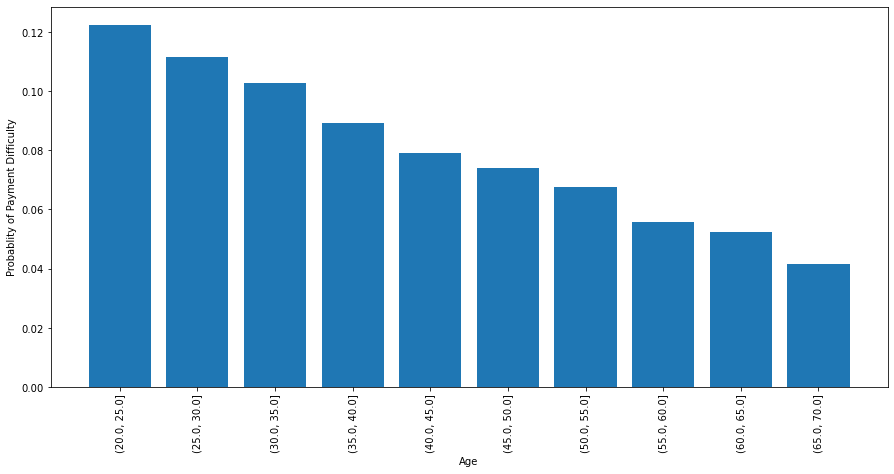

In [157]:
plt.figure(figsize=(15,7))
plt.bar(age_type.index.astype(str) , age_type.TARGET)
plt.xticks(rotation = 90)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("Age")
plt.show()

In [158]:
age.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','MONTH_BIRTH'],axis=1,inplace=True)
age.describe()

,TARGET,YEAR_BIRTH,MONTH_EMPLOYED,MONTH_REGISTRATION,MONTH_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,44.547727,-2127.209062,166.202698,99.806394
std,0.272419,12.125381,4709.282400,117.431384,50.316713
min,0.000000,21.000000,-12175.000000,0.000000,0.000000
25%,0.000000,34.000000,10.000000,67.000000,57.000000
50%,0.000000,44.000000,40.000000,150.000000,108.000000
75%,0.000000,55.000000,92.000000,249.000000,143.000000
max,1.000000,70.000000,597.000000,822.000000,240.000000


In [159]:
age['MONTH_EMPLOYED_BINNED'] = pd.cut(age['MONTH_EMPLOYED'], bins = np.linspace(0, 600, num = 16))

age['MONTH_ID_PUBLISH_BINNED'] = pd.cut(age['MONTH_ID_PUBLISH'], bins = np.linspace(0, 240, num = 13))
age.head()

,TARGET,YEAR_BIRTH,MONTH_EMPLOYED,MONTH_REGISTRATION,MONTH_ID_PUBLISH,YEAR_BIRTH_BINNED,MONTH_EMPLOYED_BINNED,MONTH_ID_PUBLISH_BINNED
0,1,26.0,21.0,122.0,71.0,"(25.0, 30.0]","(0.0, 40.0]","(60.0, 80.0]"
1,0,47.0,40.0,40.0,10.0,"(45.0, 50.0]","(0.0, 40.0]","(0.0, 20.0]"
2,0,53.0,8.0,142.0,84.0,"(50.0, 55.0]","(0.0, 40.0]","(80.0, 100.0]"
3,0,53.0,101.0,328.0,81.0,"(50.0, 55.0]","(80.0, 120.0]","(80.0, 100.0]"
4,0,55.0,101.0,144.0,115.0,"(50.0, 55.0]","(80.0, 120.0]","(100.0, 120.0]"


In [160]:
employed_type = inp0.pivot_table(index = age.MONTH_EMPLOYED_BINNED 
                          , values = 'TARGET' , aggfunc ="mean" )
employed_type

,TARGET
MONTH_EMPLOYED_BINNED,
"(0.0, 40.0]",0.109807
"(40.0, 80.0]",0.089430
"(80.0, 120.0]",0.068902
"(120.0, 160.0]",0.058271
"(160.0, 200.0]",0.053934
"(200.0, 240.0]",0.048417
"(240.0, 280.0]",0.046617
"(280.0, 320.0]",0.046441
"(320.0, 360.0]",0.038878


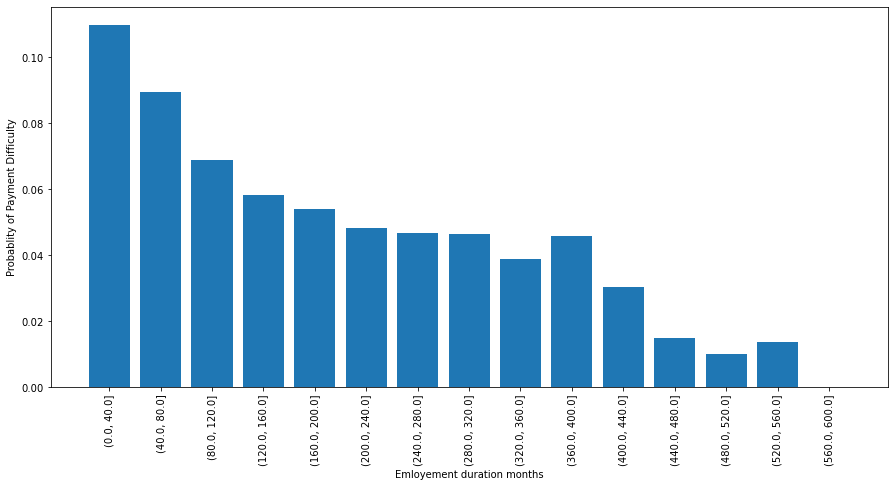

In [161]:
plt.figure(figsize=(15,7))
plt.bar(employed_type.index.astype(str) , employed_type.TARGET)
plt.xticks(rotation = 90)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("Emloyement duration months")
plt.show()

In [162]:
idp = inp0.pivot_table(index = age.MONTH_ID_PUBLISH_BINNED
                          , values = 'TARGET' , aggfunc ="mean" )
idp


,TARGET
MONTH_ID_PUBLISH_BINNED,
"(0.0, 20.0]",0.101998
"(20.0, 40.0]",0.098493
"(40.0, 60.0]",0.095512
"(60.0, 80.0]",0.089019
"(80.0, 100.0]",0.087905
"(100.0, 120.0]",0.078651
"(120.0, 140.0]",0.077114
"(140.0, 160.0]",0.061683
"(160.0, 180.0]",0.060929


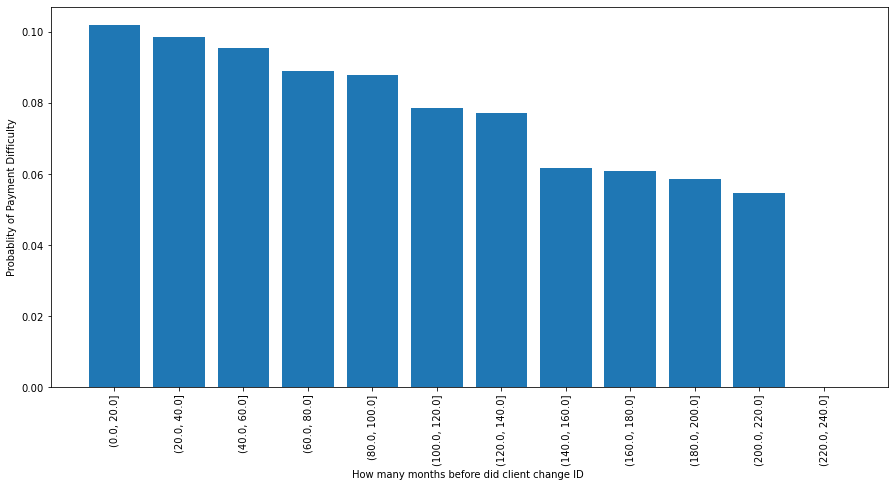

In [163]:
plt.figure(figsize=(15,7))
plt.bar(idp.index.astype(str) , idp.TARGET)
plt.xticks(rotation = 90)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("How many months before did client change ID ")
plt.show()

#### Older people ; people with higher prior employement duration ; people who have not changed their ID in last 100 months are more likely to repay. Since it is the older people who have relatively higher employement duration and who might not have changed ID (because younger people might have recently got an ID),we can generalise that older people are more likely to repay

- ### Subtask 3.5 : Score from external data source and likelyhood of payment

In [164]:
sc = inp0.iloc[:,[1,40,41]]


In [165]:
sc['EXT_SOURCE_2_BIN'] = pd.cut(sc['EXT_SOURCE_2'], bins = np.linspace(0, 1, num = 21))
sc['EXT_SOURCE_3_BIN'] = pd.cut(sc['EXT_SOURCE_3'], bins = np.linspace(0, 1, num = 21))


In [166]:
sc2 = sc.pivot_table(index = sc.EXT_SOURCE_2_BIN
                          , values = 'TARGET' , aggfunc ="mean" )
sc3 = sc.pivot_table(index = sc.EXT_SOURCE_3_BIN
                          , values = 'TARGET' , aggfunc ="mean" )
sc2

,TARGET
EXT_SOURCE_2_BIN,
"(0.0, 0.05]",0.262736
"(0.05, 0.1]",0.205961
"(0.1, 0.15]",0.182948
"(0.15, 0.2]",0.142592
"(0.2, 0.25]",0.136498
"(0.25, 0.3]",0.115577
"(0.3, 0.35]",0.114871
"(0.35, 0.4]",0.104584
"(0.4, 0.45]",0.092429


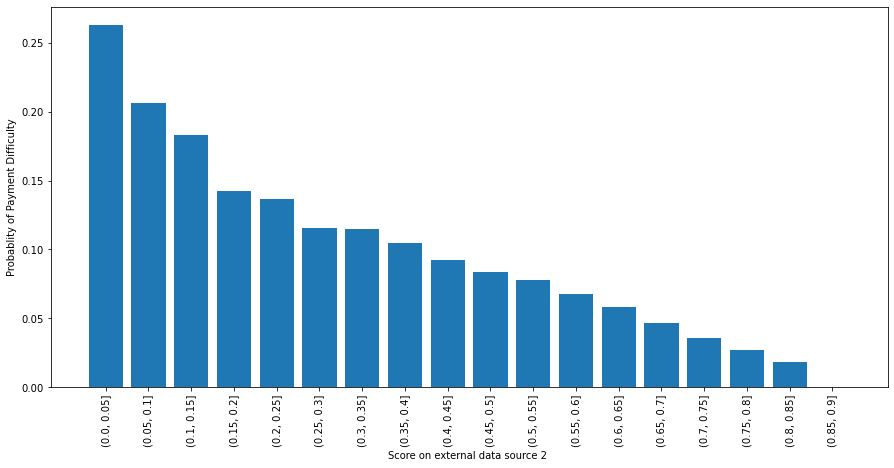

In [167]:
plt.figure(figsize=(15,7))
plt.bar(sc2.index.astype(str) , sc2.TARGET)
plt.xticks(rotation = 90)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("Score on external data source 2 ")
plt.show()

In [108]:
sc3

,TARGET
EXT_SOURCE_3_BIN,
"(0.0, 0.05]",0.274243
"(0.05, 0.1]",0.258547
"(0.1, 0.15]",0.213809
"(0.15, 0.2]",0.170037
"(0.2, 0.25]",0.154666
"(0.25, 0.3]",0.128430
"(0.3, 0.35]",0.111380
"(0.35, 0.4]",0.093552
"(0.4, 0.45]",0.083324


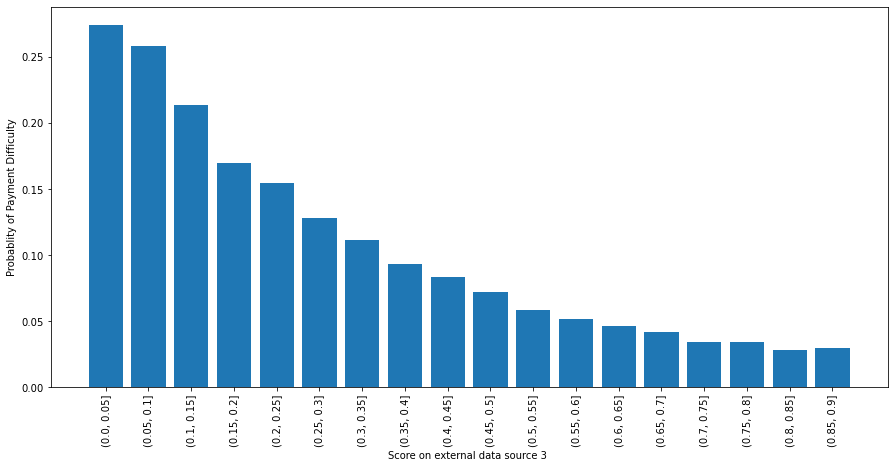

In [168]:
plt.figure(figsize=(15,7))
plt.bar(sc3.index.astype(str) , sc3.TARGET)
plt.xticks(rotation = 90)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("Score on external data source 3 ")
plt.show()

#### Normalised data from external source are reliable indicators for predicting likelyhood of payment. Score above 0.5  indicates more likelyhood of payment. Score below 0.4 indicates that applicant might face difficulty in repayment 

- ### Subtask 3.6 : Car-House ownership and likelyhood of payment

In [40]:
doc = inp0.iloc[:,[1,8,4,5]]
doc.head()

,TARGET,AMT_CREDIT,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,1,406597.5,N,Y
1,0,1293502.5,N,N
2,0,135000.0,Y,Y
3,0,312682.5,N,Y
4,0,513000.0,N,Y


In [41]:
ptcar = doc.pivot_table(columns ='FLAG_OWN_CAR'  , values = 'TARGET' , aggfunc = 'mean')
ptcar

FLAG_OWN_CAR,N,Y
TARGET,0.085002,0.072437


In [42]:
ptrealty = doc.pivot_table(columns ='FLAG_OWN_REALTY'  , values = 'TARGET' , aggfunc = 'mean')
ptrealty

FLAG_OWN_REALTY,N,Y
TARGET,0.083249,0.079616


#### Car and realty ownership has no significant impact on repayment

- ### Subtask 3.7 : Region rating and likelyhood of payment

In [43]:
reg = inp0.iloc[:,[1,8,29,30]]


In [44]:
ptreg1 = reg.pivot_table(index ='REGION_RATING_CLIENT'  , values = 'TARGET' , aggfunc = 'mean')
ptreg1

,TARGET
REGION_RATING_CLIENT,
1,0.048203
2,0.078891
3,0.111028


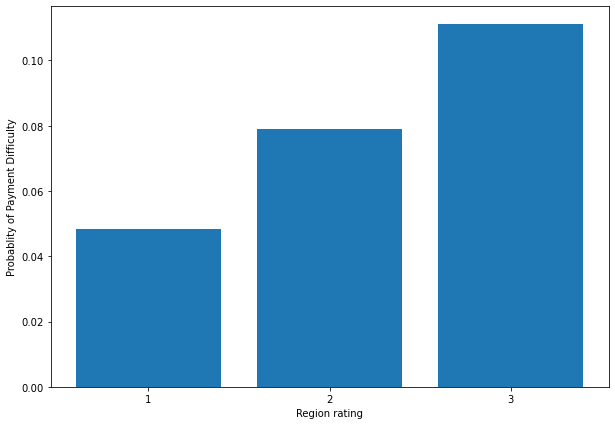

In [48]:
plt.figure(figsize=(10,7))
plt.bar(ptreg1.index.astype(str) , ptreg1.TARGET)
plt.xticks(rotation = 0)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("Region rating")
plt.show()

In [115]:
ptreg2 = reg.pivot_table(index ='REGION_RATING_CLIENT_W_CITY'  , values = 'TARGET' , aggfunc = 'mean')
ptreg2

,TARGET
REGION_RATING_CLIENT_W_CITY,
1,0.048409
2,0.079178
3,0.114022


#### People living in region 1 & 2 are more likely to repay than in region 3 

- ### Subtask 3.8 : Family Status , cnt_family members, cnt_children  and likelyhood of payment

In [116]:
fam = inp0.iloc[:,[1,6,14,28]]
ptfamst1 = fam.pivot_table(index ='NAME_FAMILY_STATUS'  , values = 'TARGET' , aggfunc = 'mean')
ptfamst1

,TARGET
NAME_FAMILY_STATUS,
Civil marriage,0.099446
Married,0.075599
Separated,0.081942
Single / not married,0.098077
Unknown,0.000000
Widow,0.058242


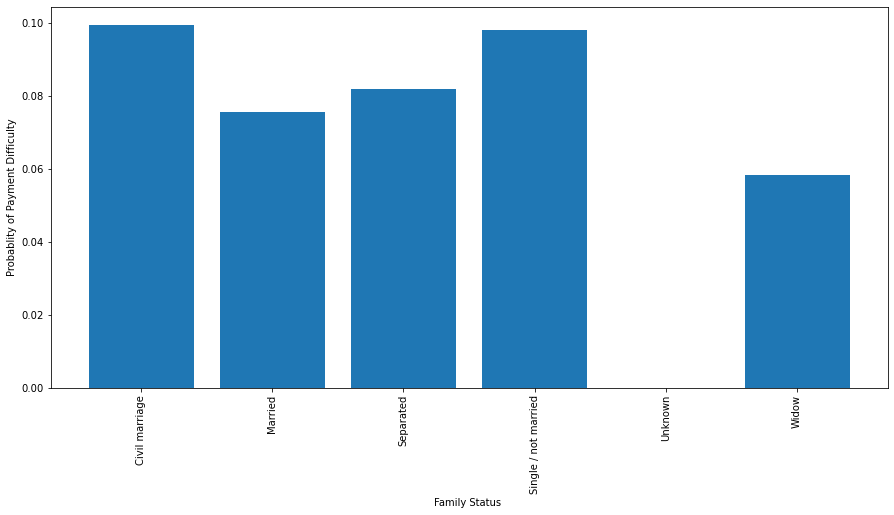

In [169]:
plt.figure(figsize=(15,7))
plt.bar(ptfamst1.index ,ptfamst1.TARGET  )
plt.xticks(rotation = 90)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("Family Status ")
plt.show()

- ### Subtask 3.8 :Credit Ticket size  and likelyhood of payment

In [118]:
ts = inp0.iloc[:,[1,8]]
ts.describe()

,TARGET,AMT_CREDIT
count,307511.000000,3.075110e+05
mean,0.080729,5.990260e+05
std,0.272419,4.024908e+05
min,0.000000,4.500000e+04
25%,0.000000,2.700000e+05
50%,0.000000,5.135310e+05
75%,0.000000,8.086500e+05
max,1.000000,4.050000e+06


In [119]:
ts['AMT_CREDIT_BIN'] = pd.cut(ts['AMT_CREDIT'], bins = np.linspace(0, 2000000, num = 11))

tspivot = ts.pivot_table(index = ts.AMT_CREDIT_BIN
                          , values = 'TARGET' , aggfunc ="mean" )
tspivot

,TARGET
AMT_CREDIT_BIN,
"(0.0, 200000.0]",0.068891
"(200000.0, 400000.0]",0.085569
"(400000.0, 600000.0]",0.101011
"(600000.0, 800000.0]",0.082397
"(800000.0, 1000000.0]",0.071682
"(1000000.0, 1200000.0]",0.065895
"(1200000.0, 1400000.0]",0.059660
"(1400000.0, 1600000.0]",0.048838
"(1600000.0, 1800000.0]",0.042410


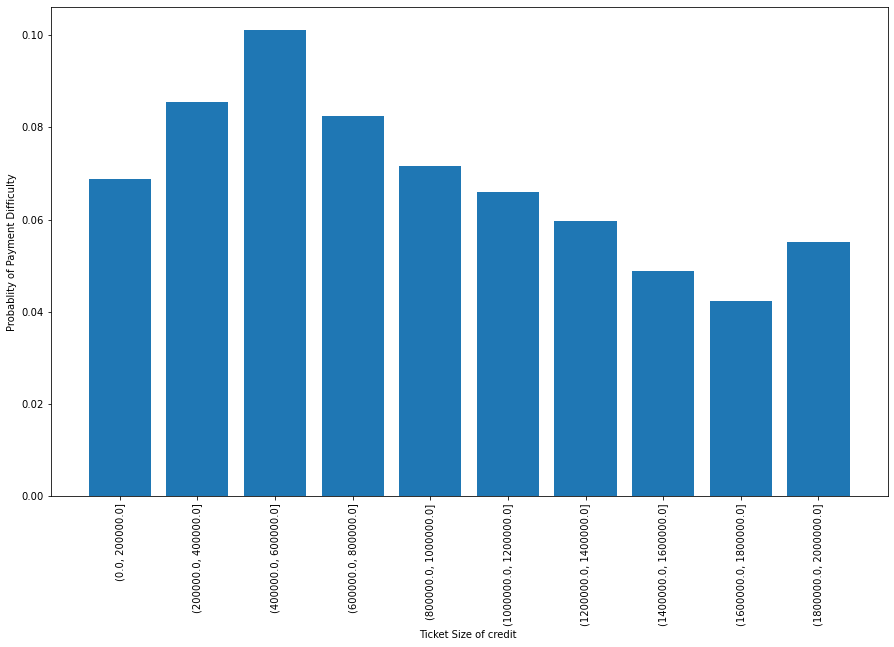

In [170]:
plt.figure(figsize=(15,9))
plt.bar(tspivot.index.astype(str) , tspivot.TARGET)
plt.xticks(rotation = 90)
plt.ylabel("Probablity of Payment Difficulty")
plt.xlabel("Ticket Size of credit ")
plt.show()

## Task 4: Multivariate Analysis

- ### Subtask 4.1 : Ananlysis of relationship between occupation type,ticket size and likelyhood of payment

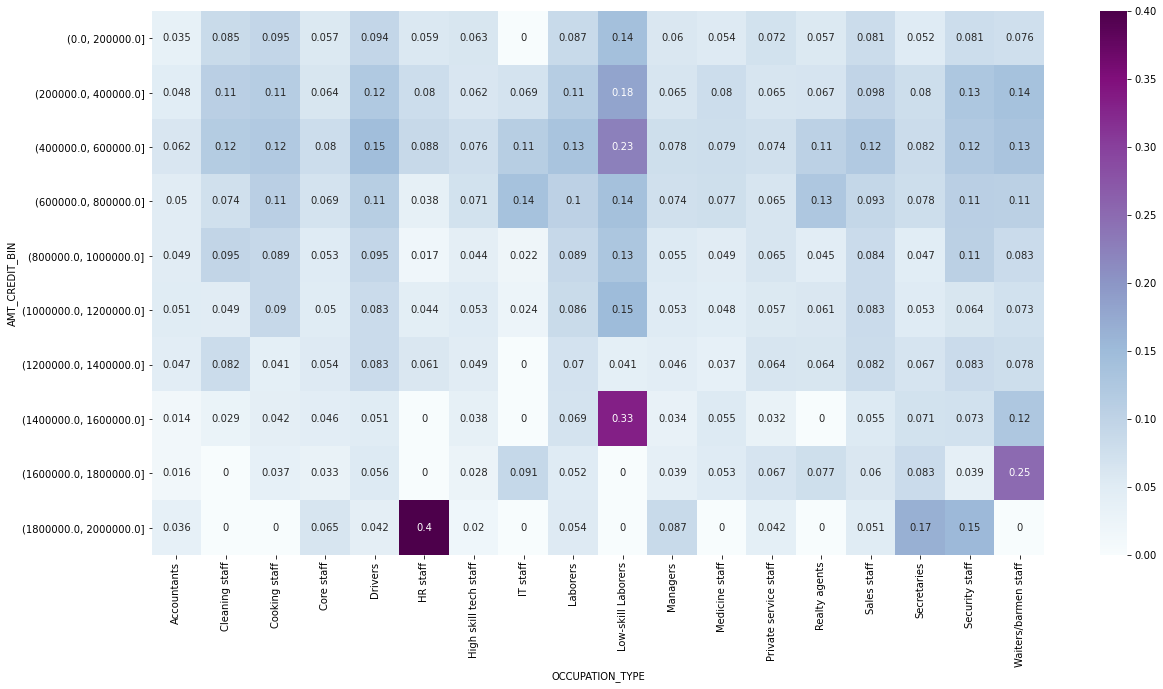

In [15]:
tsi = inp0.iloc[:,[1,8,27]]
tsi['AMT_CREDIT_BIN'] = pd.cut(tsi['AMT_CREDIT'], bins = np.linspace(0, 2000000, num = 11))

tsipivot = tsi.pivot_table(columns ='OCCUPATION_TYPE', index = tsi.AMT_CREDIT_BIN
                          , values = 'TARGET' , aggfunc =("mean"))
plt.figure(figsize=(20,10))
sns.heatmap(tsipivot,cmap="BuPu"  , annot = True)
plt.show()

In [16]:
tsiipivot = tsi.pivot_table(columns ='OCCUPATION_TYPE', index = tsi.AMT_CREDIT_BIN
                          , values = 'TARGET' , aggfunc =("count"))
tsiipivot

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
AMT_CREDIT_BIN,,,,,,,,,,,,,,,,,,
"(0.0, 200000.0]",770,684,831,3128,1830,51,1161,62,6871,382,1243,1015,279,70,4123,153,914,250
"(200000.0, 400000.0]",2093,1464,1670,7026,4566,125,2727,131,15214,703,3749,2146,631,164,8936,352,1872,410
"(400000.0, 600000.0]",2025,998,1354,5655,4447,125,2419,117,12518,484,4228,1788,582,170,7233,293,1461,303
"(600000.0, 800000.0]",1365,608,862,3794,2762,78,1629,58,7324,244,3324,1230,402,111,4352,153,871,159
"(800000.0, 1000000.0]",1141,451,538,2927,1890,58,1212,46,5363,132,2791,917,260,88,3025,149,721,96
"(1000000.0, 1200000.0]",961,245,378,2128,1465,45,942,42,3819,86,2281,647,227,66,2192,95,453,55
"(1200000.0, 1400000.0]",683,146,195,1417,915,33,669,33,2385,49,1777,458,140,47,1346,60,264,51
"(1400000.0, 1600000.0]",351,34,71,691,396,20,292,12,889,6,740,164,63,13,473,28,82,16
"(1600000.0, 1800000.0]",193,17,27,397,179,13,180,11,463,6,537,95,30,13,233,12,51,4


- ### Subtask 4.2 : Ananlysis of relationship between Education,ticket size and likelyhood of payment

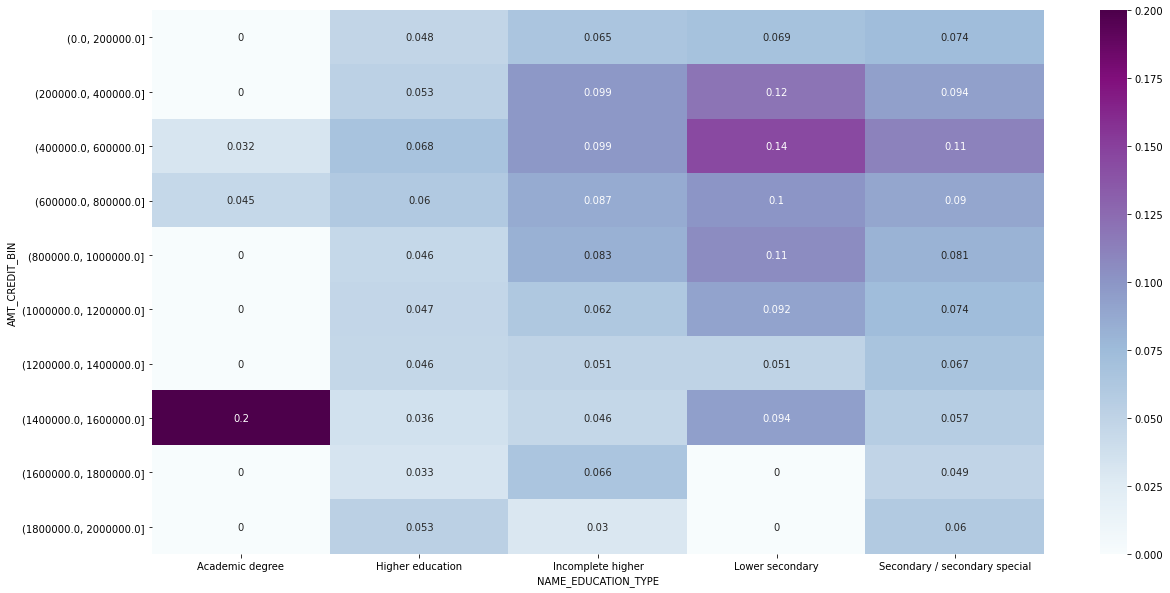

In [17]:
ts1 = inp0.iloc[:,[1,8,13]]
ts1['AMT_CREDIT_BIN'] = pd.cut(ts1['AMT_CREDIT'], bins = np.linspace(0, 2000000, num = 11))

ts1pivot = ts1.pivot_table(columns ='NAME_EDUCATION_TYPE', index = ts1.AMT_CREDIT_BIN
                          , values = 'TARGET' , aggfunc =("mean"))
plt.figure(figsize=(20,10))
sns.heatmap(ts1pivot,cmap="BuPu"  , annot = True)
plt.show()

#### Earlier we had stated that:
#### People having a academic degree or a higher education level are more likely to repay
#### People having incomplete higher or lesser education are less likely to repay
#### The applicants taking a credit of upto 200000 even when they are less educated are more likely to pay 
#### The checks and balances seem to be in place when it comes to loans of ticket size higher than 1000000. 
#### But in the range of 200000 to 1000000 there is high probablity of default in peole with low education 

- ### Subtask 4.3 : Ananlysis of relationship between Age ,External Source Data ,Employment Duration size and likelyhood of payment

In [18]:
age1 = inp0.iloc[:,[1,17,18,19,20,40]]
age1["MONTH_BIRTH"] = round(age1["DAYS_BIRTH"]/-30)
age1["YEAR_BIRTH"] = round(age1["MONTH_BIRTH"]/12)
age1["MONTH_EMPLOYED"] = round(age1["DAYS_EMPLOYED"]/-30)
age1['YEAR_BIRTH_BINNED'] = pd.cut(age1['YEAR_BIRTH'], bins = np.linspace(20, 70, num = 11))
age1['EXT_SOURCE_2_BIN'] = pd.cut(age1['EXT_SOURCE_2'], bins = np.linspace(0, 1, num = 21))
age1['MONTH_EMPLOYED_BINNED'] = pd.cut(age1['MONTH_EMPLOYED'], bins = np.linspace(0, 600, num = 7))
age1.drop(['DAYS_BIRTH',             
   'DAYS_EMPLOYED',          
   'DAYS_REGISTRATION',      
   'DAYS_ID_PUBLISH',        
   'EXT_SOURCE_2',           
   'MONTH_BIRTH',           
   'YEAR_BIRTH',           
   'MONTH_EMPLOYED'],axis=1,inplace=True )
age1.head()

,TARGET,YEAR_BIRTH_BINNED,EXT_SOURCE_2_BIN,MONTH_EMPLOYED_BINNED
0,1,"(25.0, 30.0]","(0.25, 0.3]","(0.0, 100.0]"
1,0,"(45.0, 50.0]","(0.6, 0.65]","(0.0, 100.0]"
2,0,"(50.0, 55.0]","(0.55, 0.6]","(0.0, 100.0]"
3,0,"(50.0, 55.0]","(0.65, 0.7]","(100.0, 200.0]"
4,0,"(50.0, 55.0]","(0.3, 0.35]","(100.0, 200.0]"


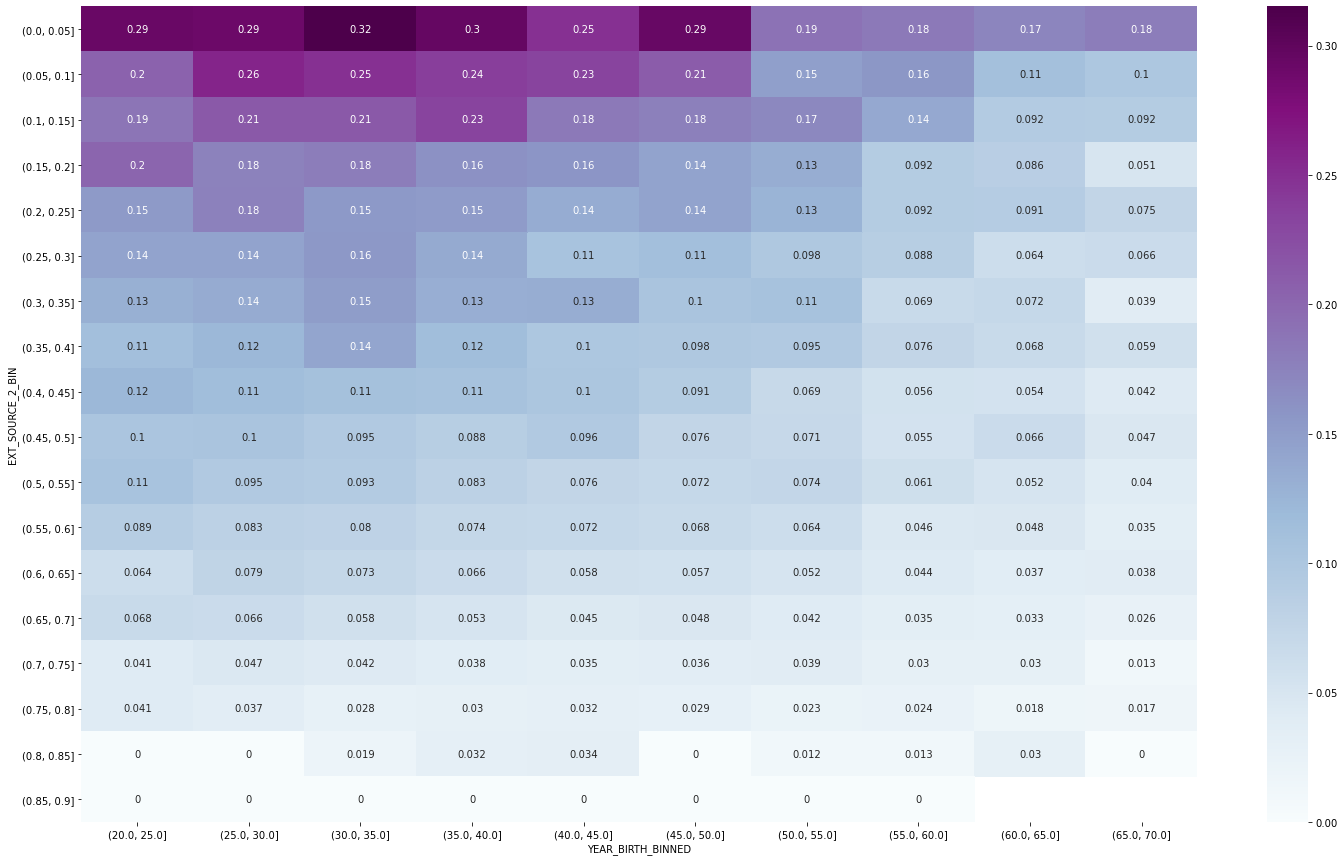

In [21]:
agepvt = age1.pivot_table(columns ='YEAR_BIRTH_BINNED', index = 'EXT_SOURCE_2_BIN'
                          , values = 'TARGET' , aggfunc =("mean"))

plt.figure(figsize=(25,15))
sns.heatmap(agepvt,cmap="BuPu"  , annot = True)
plt.show()

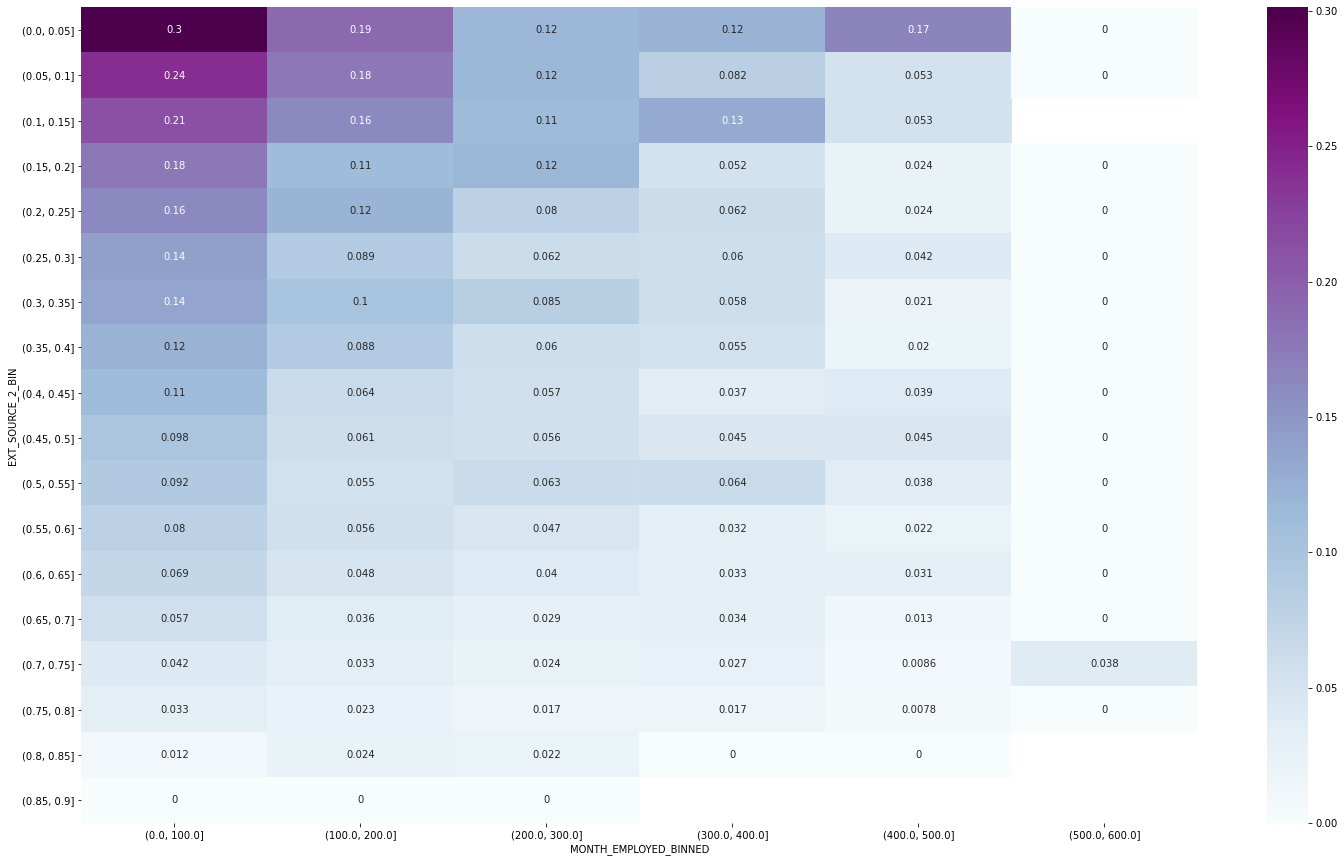

In [20]:
empm = age1.pivot_table(columns ='MONTH_EMPLOYED_BINNED', index = 'EXT_SOURCE_2_BIN'
                          , values = 'TARGET' , aggfunc =("mean"))
plt.figure(figsize=(25,15))
sns.heatmap(empm,cmap="BuPu"  , annot = True)
plt.show()

#### We had suggested that younger people were more likely to default on credit than older people. Looking for the heat maps we can say that for applicants under the age of 40 having score of 0.6 or greater are more likely to pay. 
#### The heat map is dark in the upper triangular portion can can be used for refernce on case to case basis

##  Task 5: Reading the previous data

In [15]:
prevdf = pd.read_csv('previous_application.csv')
prevdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Droping columns having more than 40% null values
cols_to_drop = ['RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','NAME_TYPE_SUITE','AMT_DOWN_PAYMENT','RATE_INTEREST_PRIVILEGED','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']
prevdf = prevdf.drop(cols_to_drop, axis = 1)

In [17]:
prevdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [18]:
prevdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [19]:
p_df = prevdf.iloc[:,[0,1,2,11,12,15,16,17,18,20,24]]
p_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,XAP,Approved,XAP,Repeater,Mobile,POS,Country-wide,middle
1,2802425,108129,Cash loans,XNA,Approved,XAP,Repeater,XNA,Cash,Contact center,low_action
2,2523466,122040,Cash loans,XNA,Approved,XAP,Repeater,XNA,Cash,Credit and cash offices,high
3,2819243,176158,Cash loans,XNA,Approved,XAP,Repeater,XNA,Cash,Credit and cash offices,middle
4,1784265,202054,Cash loans,Repairs,Refused,HC,Repeater,XNA,Cash,Credit and cash offices,high


In [20]:
c_df = inp0.iloc[:,[0,1,2,3,12,13,14,15,17,18,40]]
c_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2
0,100002,1,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,0.262949
1,100003,0,Cash loans,F,State servant,Higher education,Married,House / apartment,-16765,-1188,0.622246
2,100004,0,Revolving loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,0.555912
3,100006,0,Cash loans,F,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,0.650442
4,100007,0,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,0.322738


In [21]:
merged = c_df.merge(p_df, on = "SK_ID_CURR" , how = 'inner')
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,SK_ID_PREV,NAME_CONTRACT_TYPE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,...,1038818,Consumer loans,XAP,Approved,XAP,New,Vehicles,POS,Stone,low_normal
1,100003,0,Cash loans,F,State servant,Higher education,Married,House / apartment,-16765,-1188,...,1810518,Cash loans,XNA,Approved,XAP,Repeater,XNA,Cash,Credit and cash offices,low_normal
2,100003,0,Cash loans,F,State servant,Higher education,Married,House / apartment,-16765,-1188,...,2636178,Consumer loans,XAP,Approved,XAP,Refreshed,Furniture,POS,Stone,middle
3,100003,0,Cash loans,F,State servant,Higher education,Married,House / apartment,-16765,-1188,...,2396755,Consumer loans,XAP,Approved,XAP,Refreshed,Consumer Electronics,POS,Country-wide,middle
4,100004,0,Revolving loans,M,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,...,1564014,Consumer loans,XAP,Approved,XAP,New,Mobile,POS,Regional / Local,middle


In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1413701 non-null  int64  
 1   TARGET                  1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x    1413701 non-null  object 
 3   CODE_GENDER             1413701 non-null  object 
 4   NAME_INCOME_TYPE        1413701 non-null  object 
 5   NAME_EDUCATION_TYPE     1413701 non-null  object 
 6   NAME_FAMILY_STATUS      1413701 non-null  object 
 7   NAME_HOUSING_TYPE       1413701 non-null  object 
 8   DAYS_BIRTH              1413701 non-null  int64  
 9   DAYS_EMPLOYED           1413701 non-null  int64  
 10  EXT_SOURCE_2            1411880 non-null  float64
 11  SK_ID_PREV              1413701 non-null  int64  
 12  NAME_CONTRACT_TYPE_y    1413701 non-null  object 
 13  NAME_CASH_LOAN_PURPOSE  1413701 non-null  object 
 14  NA

In [23]:
app_count = merged.pivot_table(index ='SK_ID_CURR'
                           , values = 'TARGET' , aggfunc =("count" ,'mean' ))
app_count

,count,mean
SK_ID_CURR,,
100002,1,1
100003,3,0
100004,1,0
100006,9,0
100007,6,0
...,...,...
456251,1,0
456252,1,0
456253,2,0


## Task 6: Bivariate Analysis of Merged data

- ### Subtask 6.1 : Ananlysis of relationship between Contract Status and likelyhood of payment

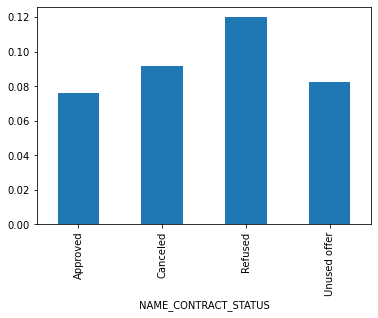

In [24]:
merged.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.bar()
plt.show()

- ### Subtask 6.2 : Ananlysis of relationship between Channel Type and likelyhood of payment

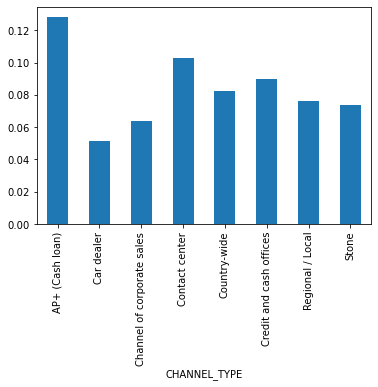

In [25]:
merged.groupby(['CHANNEL_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

- ### Subtask 6.3 : Ananlysis of relationship between Rejection Reason and likelyhood of payment

In [34]:
merged.loc[merged.CODE_REJECT_REASON == 'XNA' , "CODE_REJECT_REASON"] = np.NAN

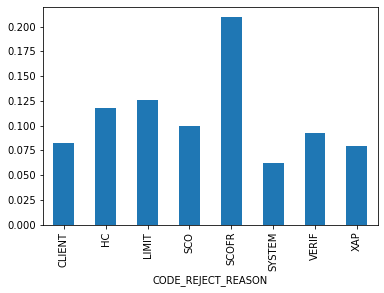

In [35]:
merged.groupby(['CODE_REJECT_REASON' ])['TARGET'].mean().plot.bar()
plt.show()



- ### Subtask 6.4 : Ananlysis of relationship between Contract Type and likelyhood of payment

In [138]:
reason_prev = merged.pivot_table(index ='NAME_CONTRACT_TYPE_y'
                          , values = 'TARGET' , aggfunc =("mean" , 'count'))
reason_prev

,count,mean
NAME_CONTRACT_TYPE_y,,
Cash loans,626764.0,0.091258
Consumer loans,625256.0,0.077100
Revolving loans,161368.0,0.104686
XNA,313.0,0.201278


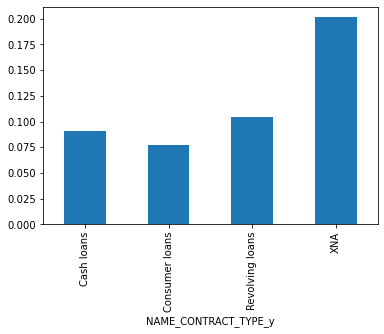

In [118]:
merged.groupby(['NAME_CONTRACT_TYPE_y'])['TARGET'].mean().plot.bar()
plt.show()

In [31]:
merged.loc[merged.NAME_YIELD_GROUP == 'XNA' , "NAME_YIELD_GROUP"] = np.NAN

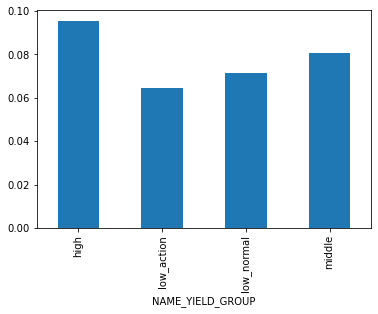

In [32]:
merged.groupby(['NAME_YIELD_GROUP'])['TARGET'].mean().plot.bar()
plt.show()

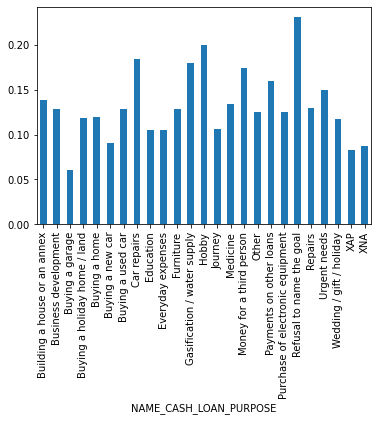

In [33]:
merged.groupby(['NAME_CASH_LOAN_PURPOSE'])['TARGET'].mean().plot.bar()
plt.show()

- ### Subtask 6.5 : Analysis of relationship between yield group ; rejection reason and likely hood of payment

In [39]:
hm1 = merged.pivot_table(index ='NAME_YIELD_GROUP' , columns = 'CODE_REJECT_REASON'
                           , values = 'TARGET' , aggfunc ='mean' )

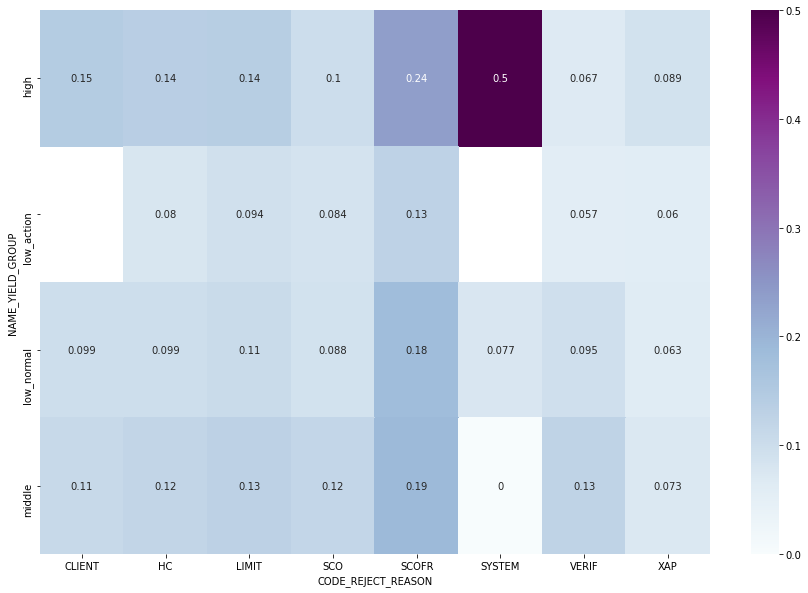

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(hm1,cmap="BuPu"  , annot = True)
plt.show()

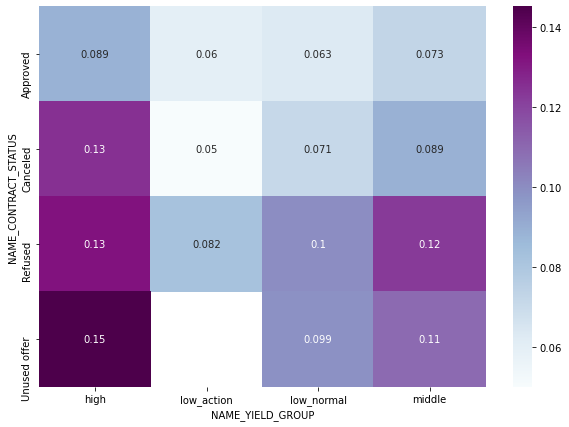

In [48]:
hm2 = merged.pivot_table(index ='NAME_CONTRACT_STATUS' , columns = 'NAME_YIELD_GROUP'
                           , values = 'TARGET' , aggfunc ='mean' )
plt.figure(figsize=(10,7))
sns.heatmap(hm2,cmap="BuPu"  , annot = True)
plt.show()

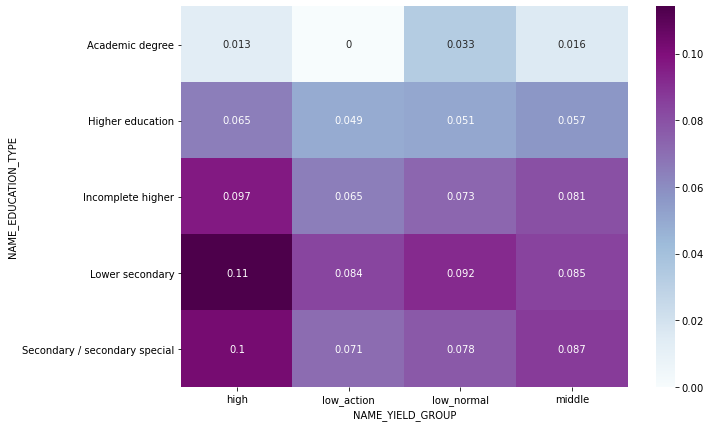

In [49]:
hm2 = merged.pivot_table(index ='NAME_EDUCATION_TYPE' , columns = 'NAME_YIELD_GROUP'
                           , values = 'TARGET' , aggfunc ='mean' )
plt.figure(figsize=(10,7))
sns.heatmap(hm2,cmap="BuPu"  , annot = True)
plt.show()

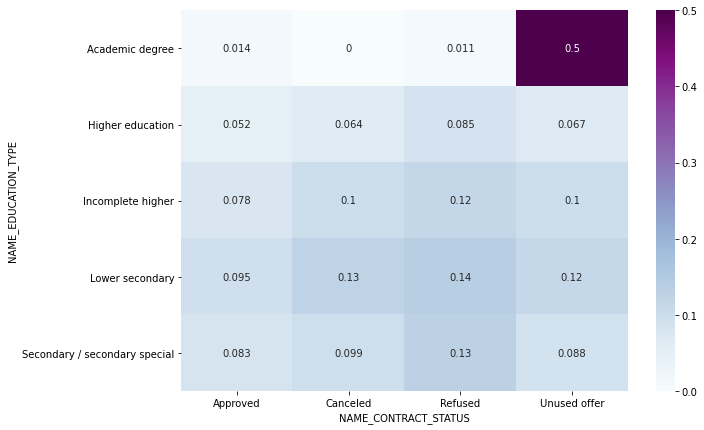

In [52]:
hm4 = merged.pivot_table(index ='NAME_EDUCATION_TYPE' , columns = 'NAME_CONTRACT_STATUS'
                           , values = 'TARGET' , aggfunc ='mean' )
plt.figure(figsize=(10,7))
sns.heatmap(hm4,cmap="BuPu"  , annot = True)
plt.show()